In [1]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import re
import warnings
import csv
warnings.filterwarnings('ignore')
import string #Extracting word from the text
import nltk
from nltk.corpus import stopwords
from collections import Counter #frequency counting
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


## Package Dependencies

- `conda install -c conda-forge vadersentiment` for Vander Sentiment
- `conda install nltk` - For NLTK package

### Establishing the connection
Created and Application in Twitter Developer account as Assessed-task-2 & copied the keyboard.

In [2]:
# Application creds made in developer account ...

consumer_key = 'jIXCU53opEikJKYRWK633SRTd'
consumer_key_secret = 'NTx4NDFUfJMuAZwg7DX4kRW7ZMpWUYUe8ZXi7fH8C5jWHhn4UZ'
access_token = '1371716702-hRzyepHlBcKVTvhI0W6Npdd7p78GjHEZb4w9v0y'
access_token_secret = 'JdvZubB0HLeqRY7qJLZ7oFZH2q9R2BPInDZ30TVEWnM7q'

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
# Authorisation of API key and API key secret.
auth.set_access_token(access_token, access_token_secret)
# Set access to user's access token and access token secret.
api = tweepy.API(auth)
# The API class provides access to the Twitter RESTful API method.

### Testing the connection

In [3]:
# Testing the authentication.
try:
    user = api.verify_credentials()
    print('Authentication OK.')
except:
    print('Error during authentication.')


Authentication OK.


# Task 1
Collect 400 tweets from two different Twitter users **(Australian politicians)**, 200 from each.  You should try to find two politicians where you would expect there to be some noticeable differences in their tweets.

**Selected politician for the Assessments:**<br>
Malcolm Turnbull with Screen name: @TurnbullMalcolm    *-Former PM of Australia. (2014-2018)*<br>
Kevin Rudd with Screen name: @MrKRudd      -* Former PM of Australia.*

### Collecting first 200 tweets of Malcolm Turnbull with Screen name: **@TurnbullMalcolm**

In [4]:
max_tweets = 200
screen_name = '@TurnbullMalcolm'
tweets_Malcolm = api.user_timeline(screen_name = screen_name, tweet_mode = 'extended', count = max_tweets)

In [5]:
Malcolm = []
for tweet in tweets_Malcolm:
    Malcolm.append(tweet._json)

with open('Data_scrapped/TurnbullMalcolm.json', mode = 'w') as file:
    file.write(json.dumps(Malcolm , indent = 4))

### Collecting first 200 tweets of Malcolm Turnbull with Screen name: **@MrRudd**

In [6]:
max_tweets = 200
screen_name = '@MrKRudd'
tweets_Rudd = api.user_timeline(screen_name = screen_name,tweet_mode = 'extended', count = max_tweets)

In [7]:
Rudd = []
for tweet in tweets_Rudd:
    Rudd.append(tweet._json)
    
with open('Data_scrapped/MrKRudd.json', mode = 'w') as file:
    file.write(json.dumps(Rudd , indent = 4))

## Creating listing for Malcolm

In [8]:
#listing the Malcolm Tweets and timings
Malcolm = []
with open('Data_scrapped/TurnbullMalcolm.json', encoding = 'utf-8', mode = 'r') as file:
        Malcolm_list = json.load(file)
        for dict in Malcolm_list:
             Malcolm.append({'user_id':str(dict['user']['name']),
                           'post_time':dict['created_at'],
                          'tweet':str(dict['full_text']),  
             })

In [9]:
Malcolm_df = pd.DataFrame(Malcolm , columns = ['user_id','post_time','tweet', ])
Malcolm_df.head(10)

,user_id,post_time,tweet
0,Malcolm Turnbull 💉💉,Thu Oct 21 00:45:35 +0000 2021,At the risk of offering a penetrating glimpse ...
1,Malcolm Turnbull 💉💉,Thu Oct 21 00:41:30 +0000 2021,Address to the Smart Energy Global Race to Zer...
2,Malcolm Turnbull 💉💉,Wed Oct 20 21:49:49 +0000 2021,RT @SmartEnergyCncl: NEWS: You can find @Turnb...
3,Malcolm Turnbull 💉💉,Wed Oct 20 20:40:05 +0000 2021,Thank you Fran! Mornings in Australia won’t be...
4,Malcolm Turnbull 💉💉,Wed Oct 20 11:36:26 +0000 2021,@NStottDespoja @UNHumanRights @UNWomenAust So ...
5,Malcolm Turnbull 💉💉,Wed Oct 20 11:05:24 +0000 2021,RT @apaul57: Thank you @TurnbullMalcolm for yo...
6,Malcolm Turnbull 💉💉,Wed Oct 20 07:40:38 +0000 2021,"RT @SmartEnergyCncl: ""Carbon capture storage a..."
7,Malcolm Turnbull 💉💉,Wed Oct 20 07:40:14 +0000 2021,RT @SDHamiltonVIC: @TurnbullMalcolm @SmartEner...
8,Malcolm Turnbull 💉💉,Wed Oct 20 07:40:03 +0000 2021,RT @RichieMerzian: You've got multiple Adani's...
9,Malcolm Turnbull 💉💉,Wed Oct 20 07:39:54 +0000 2021,RT @SDHamiltonVIC: @VickiTreadell @ukinaustral...


In [10]:
#checking only 200 rows are fetched here.
Malcolm_df.shape

(200, 3)

In [11]:
Malcolm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    200 non-null    object
 1   post_time  200 non-null    object
 2   tweet      200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [12]:
#Need to change the datatype further for plotting post time,Hour
Malcolm_df['post_time'] = pd.to_datetime(Malcolm_df['post_time'])
Malcolm_df['hour'] = Malcolm_df['post_time'].dt.hour

In [13]:
Malcolm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_id    200 non-null    object             
 1   post_time  200 non-null    datetime64[ns, UTC]
 2   tweet      200 non-null    object             
 3   hour       200 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 6.4+ KB


## Creating lisitng for MrKRudd

In [14]:
#listing the Malcolm Tweets and timings
Rudd = []
with open('Data_scrapped/MrKRudd.json', encoding = 'utf-8', mode = 'r') as file:
        Rudd_list = json.load(file)
        for dict in Rudd_list:
             Rudd.append({'user_id':str(dict['user']['name']),
                           'post_time':dict['created_at'],
                          'tweet':str(dict['full_text']),  
             })

In [15]:
Rudd_df = pd.DataFrame(Rudd , columns = ['user_id','post_time','tweet', ])
Rudd_df.head(10)

,user_id,post_time,tweet
0,Kevin Rudd,Thu Oct 21 15:44:42 +0000 2021,If accurate - that Morrison has tried to alter...
1,Kevin Rudd,Thu Oct 21 04:23:31 +0000 2021,It is wholly legitimate for Australians to wan...
2,Kevin Rudd,Wed Oct 20 23:13:47 +0000 2021,I suppose we’ve all got to zip sometime…\n\nCo...
3,Kevin Rudd,Wed Oct 20 12:59:25 +0000 2021,The National Party no longer reflects the inte...
4,Kevin Rudd,Wed Oct 20 01:09:31 +0000 2021,Whatever emerges from these opaque discussions...
5,Kevin Rudd,Tue Oct 19 20:49:47 +0000 2021,RT @AustralianLabor: This Wednesday we invite ...
6,Kevin Rudd,Tue Oct 19 10:33:17 +0000 2021,I had the pleasure of addressing the Australia...
7,Kevin Rudd,Mon Oct 18 22:55:53 +0000 2021,Getting underway in a few minutes. Register he...
8,Kevin Rudd,Mon Oct 18 08:47:20 +0000 2021,This is beyond gutless. Why doesn’t Morrison a...
9,Kevin Rudd,Mon Oct 18 08:37:11 +0000 2021,"Malcolm is right on Murdoch, Morrison and Clim..."


In [16]:
#checking only 200 rows are fetched here.
Rudd_df.shape

(200, 3)

In [17]:
Rudd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    200 non-null    object
 1   post_time  200 non-null    object
 2   tweet      200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [18]:
#Need to change the datatype further for plotting post time,Hour
Rudd_df['post_time'] = pd.to_datetime(Rudd_df['post_time'])
Rudd_df['hour'] = Rudd_df['post_time'].dt.hour

In [19]:
Rudd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   user_id    200 non-null    object             
 1   post_time  200 non-null    datetime64[ns, UTC]
 2   tweet      200 non-null    object             
 3   hour       200 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 6.4+ KB


## Listing Both Twitter Account to one table

In [20]:
df = pd.concat([Malcolm_df,Rudd_df], axis=0).reset_index()
df

,index,user_id,post_time,tweet,hour
0,0,Malcolm Turnbull 💉💉,2021-10-21 00:45:35+00:00,At the risk of offering a penetrating glimpse ...,0
1,1,Malcolm Turnbull 💉💉,2021-10-21 00:41:30+00:00,Address to the Smart Energy Global Race to Zer...,0
2,2,Malcolm Turnbull 💉💉,2021-10-20 21:49:49+00:00,RT @SmartEnergyCncl: NEWS: You can find @Turnb...,21
3,3,Malcolm Turnbull 💉💉,2021-10-20 20:40:05+00:00,Thank you Fran! Mornings in Australia won’t be...,20
4,4,Malcolm Turnbull 💉💉,2021-10-20 11:36:26+00:00,@NStottDespoja @UNHumanRights @UNWomenAust So ...,11
...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-23 11:58:22+00:00,Appalling evidence from inside Murdoch’s empir...,11
396,196,Kevin Rudd,2021-08-23 09:05:26+00:00,Murdoch's protection racket on lockdowns: Whil...,9
397,197,Kevin Rudd,2021-08-23 07:42:12+00:00,Murdoch rolling out the protection racket for ...,7
398,198,Kevin Rudd,2021-08-22 14:57:23+00:00,It’s time to maximise the pressure on Morrison...,14


In [21]:
#csv path
PATH = "Data_scrapped/tweets_summary.csv"
df.to_csv(PATH)

# Task 2
Use pandas to plot the posting times of the tweets for the two users in one bar chart; the aim of the plot is to distinguish the two users.

In [22]:
#Extract posting hour from posting_time
Malcolm_df['post_time'] = pd.to_datetime(Malcolm_df['post_time'])
Rudd_df['hour'] = Malcolm_df['post_time'].dt.hour
Rudd_df['post_time'] = pd.to_datetime(Rudd_df['post_time'])
Rudd_df['hour'] = Rudd_df['post_time'].dt.hour

In [23]:
Rudd_df

,user_id,post_time,tweet,hour
0,Kevin Rudd,2021-10-21 15:44:42+00:00,If accurate - that Morrison has tried to alter...,15
1,Kevin Rudd,2021-10-21 04:23:31+00:00,It is wholly legitimate for Australians to wan...,4
2,Kevin Rudd,2021-10-20 23:13:47+00:00,I suppose we’ve all got to zip sometime…\n\nCo...,23
3,Kevin Rudd,2021-10-20 12:59:25+00:00,The National Party no longer reflects the inte...,12
4,Kevin Rudd,2021-10-20 01:09:31+00:00,Whatever emerges from these opaque discussions...,1
...,...,...,...,...
195,Kevin Rudd,2021-08-23 11:58:22+00:00,Appalling evidence from inside Murdoch’s empir...,11
196,Kevin Rudd,2021-08-23 09:05:26+00:00,Murdoch's protection racket on lockdowns: Whil...,9
197,Kevin Rudd,2021-08-23 07:42:12+00:00,Murdoch rolling out the protection racket for ...,7
198,Kevin Rudd,2021-08-22 14:57:23+00:00,It’s time to maximise the pressure on Morrison...,14


In [24]:
Malcolm_post_hour= Malcolm_df['hour'].value_counts().sort_index().to_frame('Malcolm_post_per_hour')
Malcolm_post_hour['hour'] = Malcolm_post_hour.index
Malcolm_post_hour.reset_index(drop=True, inplace=True)
Malcolm_post_hour = Malcolm_post_hour[['hour','Malcolm_post_per_hour']]
Malcolm_post_hour.head(3)

,hour,Malcolm_post_per_hour
0,0,9
1,1,11
2,2,15


In [25]:
Rudd_post_hour= Rudd_df['hour'].value_counts().sort_index().to_frame('Rudd_post_per_hour')
Rudd_post_hour['hour'] = Rudd_post_hour.index
Rudd_post_hour.reset_index(drop=True, inplace=True)
Rudd_post_hour = Rudd_post_hour[['hour','Rudd_post_per_hour']]
Rudd_post_hour.head(3)

,hour,Rudd_post_per_hour
0,0,7
1,1,19
2,2,18


### Merging the above two split hours count into one table.

In [26]:
df_hours = pd.merge(Malcolm_post_hour, Rudd_post_hour,on = ['hour'], how = 'outer')
df_hours.fillna(0, inplace=True) #throwing error without this NA filter

df_hours.set_index('hour', inplace=True)
df_hours = df_hours.sort_index(). astype(int)
df_hours

,Malcolm_post_per_hour,Rudd_post_per_hour
hour,,
0,9,7
1,11,19
2,15,18
3,4,13
4,3,9
5,13,17
6,9,21
7,8,14
8,12,12


### Plotting the Bar Graph using pandas

Text(0.5, 0, 'Time')

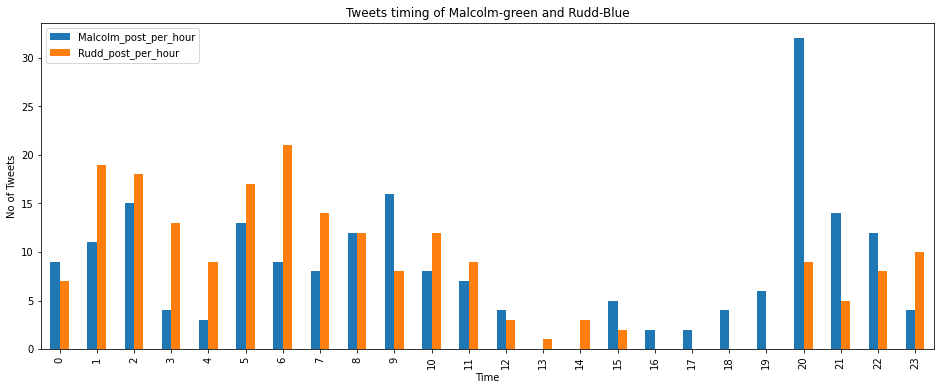

In [27]:
# Rudd_df & Malcolm_df are the data frame here. and df carries both listing together 
df_hours.plot(kind='bar', figsize=(16,6))
plt.title('Tweets timing of Malcolm-green and Rudd-Blue')
plt.ylabel('No of Tweets')
plt.xlabel('Time')

## From the above we got to know that the both users tweets active mostly in the morning time, whereas Malcolm tend to use tweet afternoon comparing to the Rudd.

# Task 3

Use pandas to construct one bar chart of the proportions of tweets for each of the two users that contain pictures or links.<br>
Removing all the retweets in the step 2 as its asking for only tweets mades.

In [28]:
#using regular expression to filter it out
df['text_without_links'] = df['tweet'].str.replace('http\S+|www.\S+', '', case = False)
df

,index,user_id,post_time,tweet,hour,text_without_links
0,0,Malcolm Turnbull 💉💉,2021-10-21 00:45:35+00:00,At the risk of offering a penetrating glimpse ...,0,At the risk of offering a penetrating glimpse ...
1,1,Malcolm Turnbull 💉💉,2021-10-21 00:41:30+00:00,Address to the Smart Energy Global Race to Zer...,0,Address to the Smart Energy Global Race to Zer...
2,2,Malcolm Turnbull 💉💉,2021-10-20 21:49:49+00:00,RT @SmartEnergyCncl: NEWS: You can find @Turnb...,21,RT @SmartEnergyCncl: NEWS: You can find @Turnb...
3,3,Malcolm Turnbull 💉💉,2021-10-20 20:40:05+00:00,Thank you Fran! Mornings in Australia won’t be...,20,Thank you Fran! Mornings in Australia won’t be...
4,4,Malcolm Turnbull 💉💉,2021-10-20 11:36:26+00:00,@NStottDespoja @UNHumanRights @UNWomenAust So ...,11,@NStottDespoja @UNHumanRights @UNWomenAust So ...
...,...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-23 11:58:22+00:00,Appalling evidence from inside Murdoch’s empir...,11,Appalling evidence from inside Murdoch’s empir...
396,196,Kevin Rudd,2021-08-23 09:05:26+00:00,Murdoch's protection racket on lockdowns: Whil...,9,Murdoch's protection racket on lockdowns: Whil...
397,197,Kevin Rudd,2021-08-23 07:42:12+00:00,Murdoch rolling out the protection racket for ...,7,Murdoch rolling out the protection racket for ...
398,198,Kevin Rudd,2021-08-22 14:57:23+00:00,It’s time to maximise the pressure on Morrison...,14,It’s time to maximise the pressure on Morrison...


In [29]:
df['tweet_links'] = df['tweet'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
df

,index,user_id,post_time,tweet,hour,text_without_links,tweet_links
0,0,Malcolm Turnbull 💉💉,2021-10-21 00:45:35+00:00,At the risk of offering a penetrating glimpse ...,0,At the risk of offering a penetrating glimpse ...,[]
1,1,Malcolm Turnbull 💉💉,2021-10-21 00:41:30+00:00,Address to the Smart Energy Global Race to Zer...,0,Address to the Smart Energy Global Race to Zer...,[https://t.co/Zh14FcDkcU]
2,2,Malcolm Turnbull 💉💉,2021-10-20 21:49:49+00:00,RT @SmartEnergyCncl: NEWS: You can find @Turnb...,21,RT @SmartEnergyCncl: NEWS: You can find @Turnb...,[https://t.co/E9hIqlc…]
3,3,Malcolm Turnbull 💉💉,2021-10-20 20:40:05+00:00,Thank you Fran! Mornings in Australia won’t be...,20,Thank you Fran! Mornings in Australia won’t be...,[]
4,4,Malcolm Turnbull 💉💉,2021-10-20 11:36:26+00:00,@NStottDespoja @UNHumanRights @UNWomenAust So ...,11,@NStottDespoja @UNHumanRights @UNWomenAust So ...,[]
...,...,...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-23 11:58:22+00:00,Appalling evidence from inside Murdoch’s empir...,11,Appalling evidence from inside Murdoch’s empir...,"[https://t.co/pxKiZcdE77, https://t.co/4RhUSMB..."
396,196,Kevin Rudd,2021-08-23 09:05:26+00:00,Murdoch's protection racket on lockdowns: Whil...,9,Murdoch's protection racket on lockdowns: Whil...,[https://t.co/0uEGXTeigI]
397,197,Kevin Rudd,2021-08-23 07:42:12+00:00,Murdoch rolling out the protection racket for ...,7,Murdoch rolling out the protection racket for ...,[https://t.co/nvrbtCjlZT]
398,198,Kevin Rudd,2021-08-22 14:57:23+00:00,It’s time to maximise the pressure on Morrison...,14,It’s time to maximise the pressure on Morrison...,[https://t.co/1J1EVMeSK8]


## Removing the RE-Tweets from the Tweet collections

In [30]:
df = df[~df['tweet'].str.startswith('RT')]
df.head(5)

,index,user_id,post_time,tweet,hour,text_without_links,tweet_links
0,0,Malcolm Turnbull 💉💉,2021-10-21 00:45:35+00:00,At the risk of offering a penetrating glimpse ...,0,At the risk of offering a penetrating glimpse ...,[]
1,1,Malcolm Turnbull 💉💉,2021-10-21 00:41:30+00:00,Address to the Smart Energy Global Race to Zer...,0,Address to the Smart Energy Global Race to Zer...,[https://t.co/Zh14FcDkcU]
3,3,Malcolm Turnbull 💉💉,2021-10-20 20:40:05+00:00,Thank you Fran! Mornings in Australia won’t be...,20,Thank you Fran! Mornings in Australia won’t be...,[]
4,4,Malcolm Turnbull 💉💉,2021-10-20 11:36:26+00:00,@NStottDespoja @UNHumanRights @UNWomenAust So ...,11,@NStottDespoja @UNHumanRights @UNWomenAust So ...,[]
20,20,Malcolm Turnbull 💉💉,2021-10-19 06:50:55+00:00,Just appeared on this with Richard Lancaster C...,6,Just appeared on this with Richard Lancaster C...,[https://t.co/DtZOlJltWa]


## Filtering the Data by Tweet contains Pictures or links

In [31]:
linked_tweet = df['tweet'].apply(lambda x: re.findall(r"http\S+|www.\S+", x))
linked_tweet.head(3)

0                           []
1    [https://t.co/Zh14FcDkcU]
3                           []
Name: tweet, dtype: object

In [32]:
#adding a new col at the end which shows the Tweet contains link or not.
df['links_boolean'] = df['tweet'].apply(lambda x: re.findall(r"http\S+|www.\S+", x)).apply((lambda x: len(x) != 0))                             
df

,index,user_id,post_time,tweet,hour,text_without_links,tweet_links,links_boolean
0,0,Malcolm Turnbull 💉💉,2021-10-21 00:45:35+00:00,At the risk of offering a penetrating glimpse ...,0,At the risk of offering a penetrating glimpse ...,[],False
1,1,Malcolm Turnbull 💉💉,2021-10-21 00:41:30+00:00,Address to the Smart Energy Global Race to Zer...,0,Address to the Smart Energy Global Race to Zer...,[https://t.co/Zh14FcDkcU],True
3,3,Malcolm Turnbull 💉💉,2021-10-20 20:40:05+00:00,Thank you Fran! Mornings in Australia won’t be...,20,Thank you Fran! Mornings in Australia won’t be...,[],False
4,4,Malcolm Turnbull 💉💉,2021-10-20 11:36:26+00:00,@NStottDespoja @UNHumanRights @UNWomenAust So ...,11,@NStottDespoja @UNHumanRights @UNWomenAust So ...,[],False
20,20,Malcolm Turnbull 💉💉,2021-10-19 06:50:55+00:00,Just appeared on this with Richard Lancaster C...,6,Just appeared on this with Richard Lancaster C...,[https://t.co/DtZOlJltWa],True
...,...,...,...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-23 11:58:22+00:00,Appalling evidence from inside Murdoch’s empir...,11,Appalling evidence from inside Murdoch’s empir...,"[https://t.co/pxKiZcdE77, https://t.co/4RhUSMB...",True
396,196,Kevin Rudd,2021-08-23 09:05:26+00:00,Murdoch's protection racket on lockdowns: Whil...,9,Murdoch's protection racket on lockdowns: Whil...,[https://t.co/0uEGXTeigI],True
397,197,Kevin Rudd,2021-08-23 07:42:12+00:00,Murdoch rolling out the protection racket for ...,7,Murdoch rolling out the protection racket for ...,[https://t.co/nvrbtCjlZT],True
398,198,Kevin Rudd,2021-08-22 14:57:23+00:00,It’s time to maximise the pressure on Morrison...,14,It’s time to maximise the pressure on Morrison...,[https://t.co/1J1EVMeSK8],True


## To plot the bar chart calculating the propotion of tweet with links & images

In [33]:
Picture_df = df.groupby(['user_id','links_boolean']).size().reset_index(name ='count')
Picture_df['total'] = Picture_df.groupby(['user_id'])['count'].transform('sum')
Picture_df = Picture_df.sort_values(by=['total'], ascending=False)
Picture_df.head(10)

,user_id,links_boolean,count,total
0,Kevin Rudd,False,2,197
1,Kevin Rudd,True,195,197
2,Malcolm Turnbull 💉💉,False,18,56
3,Malcolm Turnbull 💉💉,True,38,56


In [34]:
Picture_df['percentage'] = [i / j * 100 for i,j in zip(Picture_df['count'], Picture_df['total'])]
Picture_df

,user_id,links_boolean,count,total,percentage
0,Kevin Rudd,False,2,197,1.015228
1,Kevin Rudd,True,195,197,98.984772
2,Malcolm Turnbull 💉💉,False,18,56,32.142857
3,Malcolm Turnbull 💉💉,True,38,56,67.857143


In [35]:
final_filter = ['user_id', 'percentage']
Picture_df_present = Picture_df[Picture_df['links_boolean'] == True]
Picture_df_present = Picture_df_present[final_filter]
Picture_df_present.head()

,user_id,percentage
1,Kevin Rudd,98.984772
3,Malcolm Turnbull 💉💉,67.857143


In [36]:
Picture_df_present.describe()

,percentage
count,2.000000
mean,83.420957
std,22.010557
min,67.857143
25%,75.639050
50%,83.420957
75%,91.202864
max,98.984772


Text(0, 0.5, 'Percentage')

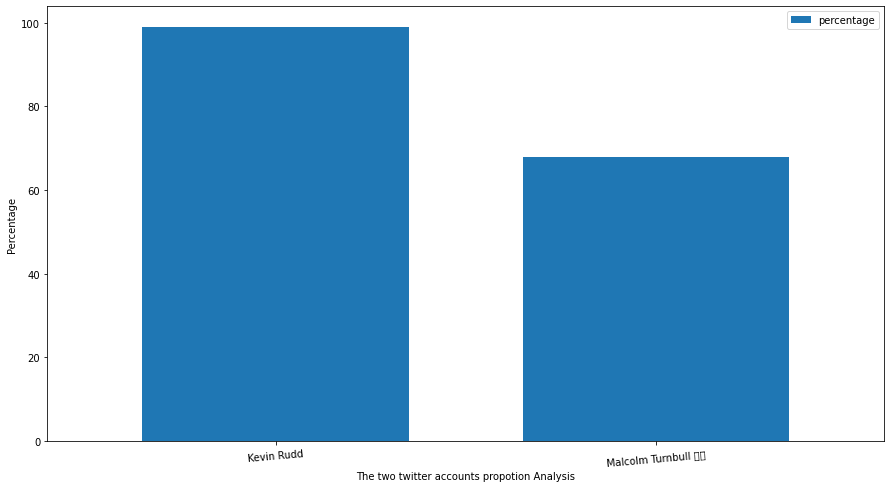

In [37]:
ax = Picture_df_present.plot(kind='bar', x='user_id', figsize=(15,8), width=0.7, rot=5)
ax.set_xlabel('The two twitter accounts propotion Analysis')
ax.set_ylabel('Percentage')

## The usage picture in Tweet is more for Kevin Rudd which is nearly 98 percentage than compare to 63% of Malcolm Tumbull.

Reference code: https://www.dataquest.io/blog/matplotlib-tutorial/

# Task 4<br>
Use pandas to construct a histogram of the number of hashtags in tweets for each of the two users.<br>
- will be filtering the Hastags of new user
- count the hashtags
- Plot bar graph using the pandas

In [38]:
df['hashtags'] = df['tweet'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags_used'] = df['tweet'].apply(lambda x: re.findall(r"#(\w+)", x)).apply((lambda x: len(x)))
df

,index,user_id,post_time,tweet,hour,text_without_links,tweet_links,links_boolean,hashtags,hashtags_used
0,0,Malcolm Turnbull 💉💉,2021-10-21 00:45:35+00:00,At the risk of offering a penetrating glimpse ...,0,At the risk of offering a penetrating glimpse ...,[],False,[],0
1,1,Malcolm Turnbull 💉💉,2021-10-21 00:41:30+00:00,Address to the Smart Energy Global Race to Zer...,0,Address to the Smart Energy Global Race to Zer...,[https://t.co/Zh14FcDkcU],True,[],0
3,3,Malcolm Turnbull 💉💉,2021-10-20 20:40:05+00:00,Thank you Fran! Mornings in Australia won’t be...,20,Thank you Fran! Mornings in Australia won’t be...,[],False,[],0
4,4,Malcolm Turnbull 💉💉,2021-10-20 11:36:26+00:00,@NStottDespoja @UNHumanRights @UNWomenAust So ...,11,@NStottDespoja @UNHumanRights @UNWomenAust So ...,[],False,[],0
20,20,Malcolm Turnbull 💉💉,2021-10-19 06:50:55+00:00,Just appeared on this with Richard Lancaster C...,6,Just appeared on this with Richard Lancaster C...,[https://t.co/DtZOlJltWa],True,[],0
...,...,...,...,...,...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-23 11:58:22+00:00,Appalling evidence from inside Murdoch’s empir...,11,Appalling evidence from inside Murdoch’s empir...,"[https://t.co/pxKiZcdE77, https://t.co/4RhUSMB...",True,[MurdochRoyalCommission],1
396,196,Kevin Rudd,2021-08-23 09:05:26+00:00,Murdoch's protection racket on lockdowns: Whil...,9,Murdoch's protection racket on lockdowns: Whil...,[https://t.co/0uEGXTeigI],True,[],0
397,197,Kevin Rudd,2021-08-23 07:42:12+00:00,Murdoch rolling out the protection racket for ...,7,Murdoch rolling out the protection racket for ...,[https://t.co/nvrbtCjlZT],True,[],0
398,198,Kevin Rudd,2021-08-22 14:57:23+00:00,It’s time to maximise the pressure on Morrison...,14,It’s time to maximise the pressure on Morrison...,[https://t.co/1J1EVMeSK8],True,[],0


- Splitting/ count the total hastag for each users
- using outer join to merge both of them
- Plot a bar chart

In [39]:
cols = ['user_id', 'hashtags_used']
df[cols]

,user_id,hashtags_used
0,Malcolm Turnbull 💉💉,0
1,Malcolm Turnbull 💉💉,0
3,Malcolm Turnbull 💉💉,0
4,Malcolm Turnbull 💉💉,0
20,Malcolm Turnbull 💉💉,0
...,...,...
395,Kevin Rudd,1
396,Kevin Rudd,0
397,Kevin Rudd,0
398,Kevin Rudd,0


In [40]:
Malcolm_hashtags = df[df['user_id'] == 'Malcolm Turnbull 💉💉']
Malcolm_hashtags = Malcolm_hashtags['hashtags_used'].value_counts().sort_index().to_frame('Malcolm Turnbull 💉💉')
Malcolm_hashtags['hashtags_used'] = Malcolm_hashtags.index
Malcolm_hashtags = Malcolm_hashtags[['hashtags_used', 'Malcolm Turnbull 💉💉']]
Malcolm_hashtags.reset_index(drop=True, inplace=True)
Malcolm_hashtags

,hashtags_used,Malcolm Turnbull 💉💉
0,0,49
1,1,5
2,2,1
3,3,1


In [41]:
Rudd_hashtags = df[df['user_id'] == 'Kevin Rudd']
Rudd_hashtags = Rudd_hashtags['hashtags_used'].value_counts().sort_index().to_frame('Kevin Rudd')
Rudd_hashtags['hashtags_used'] = Rudd_hashtags.index
Rudd_hashtags = Rudd_hashtags[['hashtags_used', 'Kevin Rudd']]
Rudd_hashtags.reset_index(drop=True, inplace=True)
Rudd_hashtags

,hashtags_used,Kevin Rudd
0,0,138
1,1,49
2,2,10


array([<AxesSubplot:title={'center':'Kevin Rudd'}>,
       <AxesSubplot:title={'center':'Malcolm Turnbull 💉💉'}>], dtype=object)

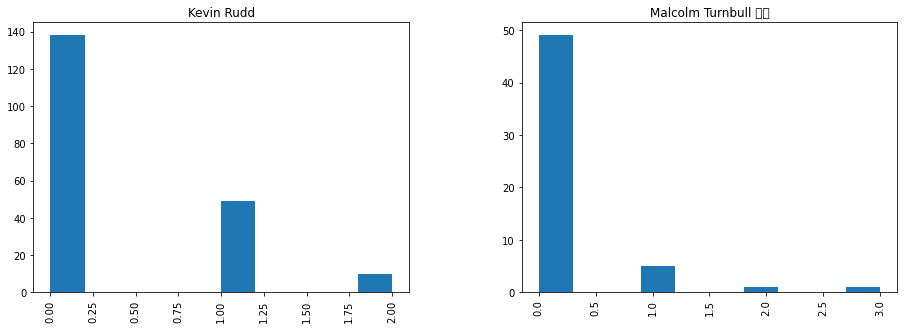

In [42]:
# Pandas histogram by group:
df.hist(by='user_id',
       column='hashtags_used', figsize=[15, 5])

In [44]:
#combining the above 2 table Hastag count for kevin and Rudd
total = pd.merge(Malcolm_hashtags, Rudd_hashtags, on = ['hashtags_used'], how = 'outer')
total.fillna(0, inplace=True)
total['Malcolm Turnbull 💉💉'] = total['Malcolm Turnbull 💉💉']. astype(int)
total['Kevin Rudd'] = total['Kevin Rudd']. astype(int)
total.set_index('hashtags_used', inplace=True)
total = total.sort_index()
total

,Malcolm Turnbull 💉💉,Kevin Rudd
hashtags_used,,
0,49,138
1,5,49
2,1,10
3,1,0


Text(0, 0.5, 'Hashtag count per tweet')

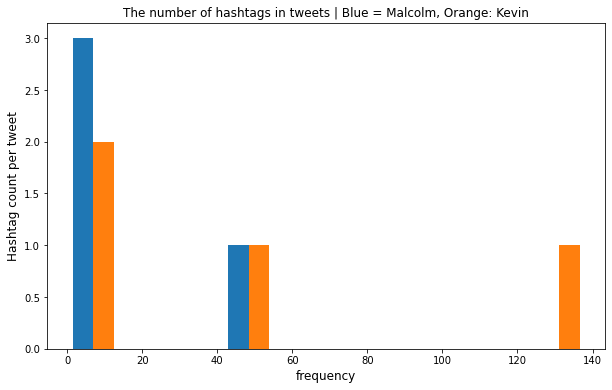

In [45]:
plt.figure(figsize=(10,6))
plt.hist(total, label=['Malcolm Turnbull 💉💉', 'Kevin Rudd'])
plt.title('The number of hashtags in tweets | Blue = Malcolm, Orange: Kevin', fontsize = 12)
plt.xlabel('frequency', fontsize = 12)
plt.ylabel('Hashtag count per tweet', fontsize = 12)

## Summary: From this its evident that Hastag count is compartively higher for Malcom and there are aroung Malcom tend to use more hastags in the tweet compare to Kevin Rudd

# Task 5
Calculate the log odds ratio for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users.
- listing 20 words with association.
- indicate the relationship between two things


In [46]:
hashtag = re.compile("#(\w+)") #adding tweets without hastags to the data frame
df['hashtags'] = df['tweet'].apply(lambda x: re.findall(r"#(\w+)", x))
df['hashtags_used'] = df['tweet'].apply(lambda x: re.findall(r"#(\w+)", x)).apply((lambda x: len(x)))
df['no_hashtags_tweets'] = df['text_without_links'].apply(lambda x: hashtag.sub(r'', x))
df

,index,user_id,post_time,tweet,hour,text_without_links,tweet_links,links_boolean,hashtags,hashtags_used,no_hashtags_tweets
0,0,Malcolm Turnbull 💉💉,2021-10-21 00:45:35+00:00,At the risk of offering a penetrating glimpse ...,0,At the risk of offering a penetrating glimpse ...,[],False,[],0,At the risk of offering a penetrating glimpse ...
1,1,Malcolm Turnbull 💉💉,2021-10-21 00:41:30+00:00,Address to the Smart Energy Global Race to Zer...,0,Address to the Smart Energy Global Race to Zer...,[https://t.co/Zh14FcDkcU],True,[],0,Address to the Smart Energy Global Race to Zer...
3,3,Malcolm Turnbull 💉💉,2021-10-20 20:40:05+00:00,Thank you Fran! Mornings in Australia won’t be...,20,Thank you Fran! Mornings in Australia won’t be...,[],False,[],0,Thank you Fran! Mornings in Australia won’t be...
4,4,Malcolm Turnbull 💉💉,2021-10-20 11:36:26+00:00,@NStottDespoja @UNHumanRights @UNWomenAust So ...,11,@NStottDespoja @UNHumanRights @UNWomenAust So ...,[],False,[],0,@NStottDespoja @UNHumanRights @UNWomenAust So ...
20,20,Malcolm Turnbull 💉💉,2021-10-19 06:50:55+00:00,Just appeared on this with Richard Lancaster C...,6,Just appeared on this with Richard Lancaster C...,[https://t.co/DtZOlJltWa],True,[],0,Just appeared on this with Richard Lancaster C...
...,...,...,...,...,...,...,...,...,...,...,...
395,195,Kevin Rudd,2021-08-23 11:58:22+00:00,Appalling evidence from inside Murdoch’s empir...,11,Appalling evidence from inside Murdoch’s empir...,"[https://t.co/pxKiZcdE77, https://t.co/4RhUSMB...",True,[MurdochRoyalCommission],1,Appalling evidence from inside Murdoch’s empir...
396,196,Kevin Rudd,2021-08-23 09:05:26+00:00,Murdoch's protection racket on lockdowns: Whil...,9,Murdoch's protection racket on lockdowns: Whil...,[https://t.co/0uEGXTeigI],True,[],0,Murdoch's protection racket on lockdowns: Whil...
397,197,Kevin Rudd,2021-08-23 07:42:12+00:00,Murdoch rolling out the protection racket for ...,7,Murdoch rolling out the protection racket for ...,[https://t.co/nvrbtCjlZT],True,[],0,Murdoch rolling out the protection racket for ...
398,198,Kevin Rudd,2021-08-22 14:57:23+00:00,It’s time to maximise the pressure on Morrison...,14,It’s time to maximise the pressure on Morrison...,[https://t.co/1J1EVMeSK8],True,[],0,It’s time to maximise the pressure on Morrison...


## Merging the tweets based on the no hastags (Count 400)

In [47]:
merge_df_no_hashtags = ['user_id', 'no_hashtags_tweets']
df2=df[merge_df_no_hashtags]
df2.describe

<bound method NDFrame.describe of                  user_id                                 no_hashtags_tweets
0    Malcolm Turnbull 💉💉  At the risk of offering a penetrating glimpse ...
1    Malcolm Turnbull 💉💉  Address to the Smart Energy Global Race to Zer...
3    Malcolm Turnbull 💉💉  Thank you Fran! Mornings in Australia won’t be...
4    Malcolm Turnbull 💉💉  @NStottDespoja @UNHumanRights @UNWomenAust So ...
20   Malcolm Turnbull 💉💉  Just appeared on this with Richard Lancaster C...
..                   ...                                                ...
395           Kevin Rudd  Appalling evidence from inside Murdoch’s empir...
396           Kevin Rudd  Murdoch's protection racket on lockdowns: Whil...
397           Kevin Rudd  Murdoch rolling out the protection racket for ...
398           Kevin Rudd  It’s time to maximise the pressure on Morrison...
399           Kevin Rudd  Morrison desperate to recapture the narrative ...

[253 rows x 2 columns]>

In [50]:
word_list= df2['no_hashtags_tweets'].apply(lambda x: re.sub('['+string.punctuation+']', '', x).split())
word_list.head(5)

0     [At, the, risk, of, offering, a, penetrating, ...
1     [Address, to, the, Smart, Energy, Global, Race...
3     [Thank, you, Fran, Mornings, in, Australia, wo...
4     [NStottDespoja, UNHumanRights, UNWomenAust, So...
20    [Just, appeared, on, this, with, Richard, Lanc...
Name: no_hashtags_tweets, dtype: object

## Modifying the Tweets for log odd ration classifications

In [51]:
#no_hashtags_tweets
df2['Final_tweets'] = df2['no_hashtags_tweets'].apply(lambda x: re.sub(r'\w', lambda m: m.group(0).lower(),x))
df2['Final_tweets'].head(5)

0     at the risk of offering a penetrating glimpse ...
1     address to the smart energy global race to zer...
3     thank you fran! mornings in australia won’t be...
4     @nstottdespoja @unhumanrights @unwomenaust so ...
20    just appeared on this with richard lancaster c...
Name: Final_tweets, dtype: object

In [52]:
#making list of words from the sentence
import string
df_list= df2['Final_tweets'].apply(lambda x: re.sub('['+string.punctuation+']', '', x).split())
df_list.head(5)

0     [at, the, risk, of, offering, a, penetrating, ...
1     [address, to, the, smart, energy, global, race...
3     [thank, you, fran, mornings, in, australia, wo...
4     [nstottdespoja, unhumanrights, unwomenaust, so...
20    [just, appeared, on, this, with, richard, lanc...
Name: Final_tweets, dtype: object

In [53]:
#Create lists from the data frame for the two users.
user= df2['user_id']
cols = ['user_id', 'df_list']
data = list(zip(user, df_list))
tweets = pd.DataFrame(data, columns=cols)


##  words list f Malcolm Turnbull 💉💉

In [54]:
tweets_JH = tweets[tweets['user_id']=='Malcolm Turnbull 💉💉']
tweets_JH = tweets_JH.reset_index(drop=True)
Malcolm_list=tweets_JH['df_list']
Malcolm_list.head(5)

0    [at, the, risk, of, offering, a, penetrating, ...
1    [address, to, the, smart, energy, global, race...
2    [thank, you, fran, mornings, in, australia, wo...
3    [nstottdespoja, unhumanrights, unwomenaust, so...
4    [just, appeared, on, this, with, richard, lanc...
Name: df_list, dtype: object

##  words list for Kevin Rudd

In [55]:
tweets_SM = tweets[tweets['user_id']=='Kevin Rudd']
tweets_SM = tweets_SM.reset_index(drop=True)
#Creating list of words of Kevin Rudd
Kevin_list=tweets_SM['df_list']
Kevin_list.head(5)

0    [if, accurate, that, morrison, has, tried, to,...
1    [it, is, wholly, legitimate, for, australians,...
2    [i, suppose, we’ve, all, got, to, zip, sometim...
3    [the, national, party, no, longer, reflects, t...
4    [whatever, emerges, from, these, opaque, discu...
Name: df_list, dtype: object

In [56]:
#using NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

M_wordlist = []
for tweet in Malcolm_list:
    for w in tweet:
        if w not in stopwords.words("english"):
            M_wordlist.append(w)
            
K_wordlist = []
for tweet in Kevin_list:
    for w in tweet:
        if w not in stopwords.words("english"):
            K_wordlist.append(w)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Ref: http://varianceexplained.org/r/trump-tweets/

In [63]:
#Counting word frequency
#Malcolm_list, M_wordlist #Kevin_list, K_wordlist
countsM = Counter(M_wordlist)

#Converting dictionary object to df
counts_M = pd.DataFrame.from_dict(countsM, orient='index').reset_index()
counts_M = counts_M.rename(columns={'index':'word', 0:'freq_M'})
counts_M['user_id'] = 'Malcolm'

#Calculating total words from Julian Hill's tweets
counts_M['total_M'] = counts_M['freq_M'].sum()

#Sorting df by word frequency and selecting the most 20 frequency words of Julian Hill's tweets
sorted_M = counts_M.sort_values(by=['freq_M'], ascending = [False])[:20]
sorted_M

,word,freq_M,user_id,total_M
76,climate,6,Malcolm,652
27,energy,6,Malcolm,652
151,turnbull,5,Malcolm,652
30,zero,5,Malcolm,652
341,storage,4,Malcolm,652
127,net,4,Malcolm,652
300,today,4,Malcolm,652
33,via,4,Malcolm,652
72,amp,4,Malcolm,652
54,congratulations,3,Malcolm,652


"""## As these are soo many words, so I will fetch only top 20 words which are common for both the users"""

In [64]:
#Counting word frequency
#Malcolm_list, M_wordlist #Kevin_list, K_wordlist
countsK = Counter(K_wordlist)

#Converting dictionary object to df
countsK = pd.DataFrame.from_dict(countsK, orient='index').reset_index()
countsK = countsK.rename(columns={'index':'word', 0:'freq_K'})
countsK['user_id'] = 'Kevin'

#Calculating total words from Julian Hill's tweets
countsK['total_K'] = countsK['freq_K'].sum()

#Sorting df by word frequency and selecting the most 20 frequency words of Julian Hill's tweets
sorted_K = countsK.sort_values(by=['freq_K'], ascending = [False])[:20]
sorted_K

,word,freq_K,user_id,total_K
134,murdoch,87,Kevin,4482
315,amp,84,Kevin,4482
1,morrison,56,Kevin,4482
455,murdoch’s,36,Kevin,4482
6,climate,27,Kevin,4482
204,quarantine,22,Kevin,4482
253,us,21,Kevin,4482
213,nsw,20,Kevin,4482
135,murdochs,20,Kevin,4482
734,covid,17,Kevin,4482


In [65]:
#merging the above two tables
top20_listing = pd.merge(sorted_M, sorted_K, on='word', how='outer')
top20_listing

,word,freq_M,user_id_x,total_M,freq_K,user_id_y,total_K
0,climate,6.0,Malcolm,652.0,27.0,Kevin,4482.0
1,energy,6.0,Malcolm,652.0,NaN,NaN,NaN
2,turnbull,5.0,Malcolm,652.0,NaN,NaN,NaN
3,zero,5.0,Malcolm,652.0,NaN,NaN,NaN
4,storage,4.0,Malcolm,652.0,NaN,NaN,NaN
5,net,4.0,Malcolm,652.0,NaN,NaN,NaN
6,today,4.0,Malcolm,652.0,NaN,NaN,NaN
7,via,4.0,Malcolm,652.0,NaN,NaN,NaN
8,amp,4.0,Malcolm,652.0,84.0,Kevin,4482.0
9,congratulations,3.0,Malcolm,652.0,NaN,NaN,NaN


In [66]:
#Dropping unused columns
top20_listing.drop(['user_id_x', 'user_id_y'], axis=1, inplace=True)

top20_listing['freq_M'] = top20_listing['freq_M'].fillna(0)
top20_listing['freq_K'] = top20_listing['freq_K'].fillna(0)
top20_listing.fillna(method='ffill', inplace=True)
top20_listing

,word,freq_M,total_M,freq_K,total_K
0,climate,6.0,652.0,27.0,4482.0
1,energy,6.0,652.0,0.0,4482.0
2,turnbull,5.0,652.0,0.0,4482.0
3,zero,5.0,652.0,0.0,4482.0
4,storage,4.0,652.0,0.0,4482.0
5,net,4.0,652.0,0.0,4482.0
6,today,4.0,652.0,0.0,4482.0
7,via,4.0,652.0,0.0,4482.0
8,amp,4.0,652.0,84.0,4482.0
9,congratulations,3.0,652.0,0.0,4482.0


"""## **Our final 20 words associated with both the users**"""

In [67]:
top20_listing['ratio_JH'] = [i+1 / j+1 for i,j in zip(top20_listing['freq_M'], top20_listing['total_K'])]
top20_listing['ratio_SM'] = [i+1 / j+1 for i,j in zip(top20_listing['freq_K'],top20_listing['total_M'])]
top20_listing['odds_ratio'] = [i/j for i,j in zip(top20_listing['ratio_JH'], top20_listing['ratio_SM'])]
top20_listing['log'] = np.log2(top20_listing['odds_ratio'])
top20_listing

,word,freq_M,total_M,freq_K,total_K,ratio_JH,ratio_SM,odds_ratio,log
0,climate,6.0,652.0,27.0,4482.0,7.000223,28.001534,0.249994,-2.000033
1,energy,6.0,652.0,0.0,4482.0,7.000223,1.001534,6.989503,2.805190
2,turnbull,5.0,652.0,0.0,4482.0,6.000223,1.001534,5.991034,2.582805
3,zero,5.0,652.0,0.0,4482.0,6.000223,1.001534,5.991034,2.582805
4,storage,4.0,652.0,0.0,4482.0,5.000223,1.001534,4.992566,2.319781
5,net,4.0,652.0,0.0,4482.0,5.000223,1.001534,4.992566,2.319781
6,today,4.0,652.0,0.0,4482.0,5.000223,1.001534,4.992566,2.319781
7,via,4.0,652.0,0.0,4482.0,5.000223,1.001534,4.992566,2.319781
8,amp,4.0,652.0,84.0,4482.0,5.000223,85.001534,0.058825,-4.087424
9,congratulations,3.0,652.0,0.0,4482.0,4.000223,1.001534,3.994097,1.997869


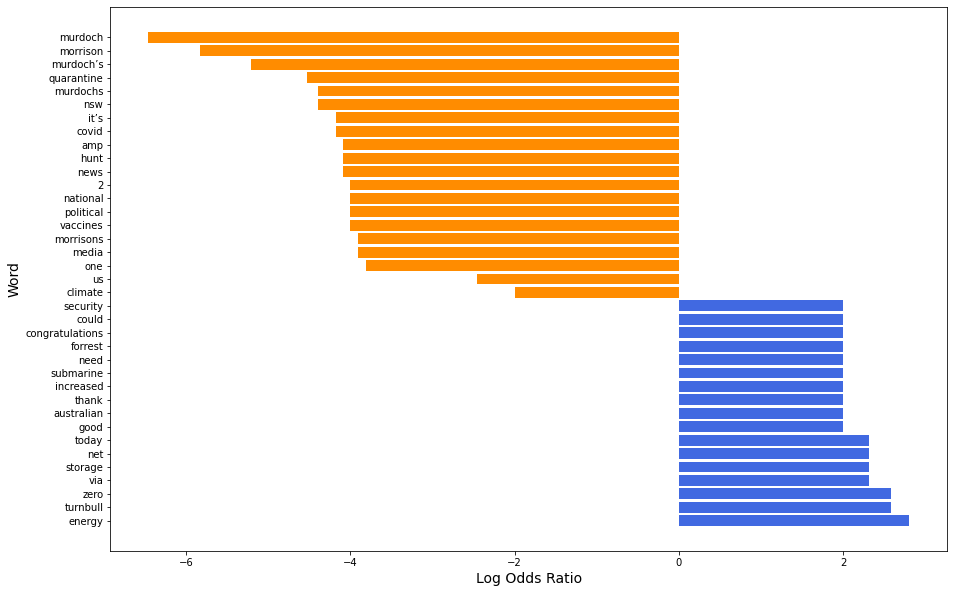

In [77]:
cols = ['word', 'log']
results_df = top20_listing[cols]

new_index = results_df.log.sort_values(ascending = False).index
sorted_results = results_df.reindex(new_index)
filtered_results = sorted_results[np.abs(sorted_results['log']) > 0]

plt.figure(figsize =(15,10))
plt.barh(filtered_results['word'], filtered_results['log'], color=colors,)

plt.xlabel('Log Odds Ratio', fontsize = 14)
plt.ylabel('Word', fontsize = 14)
plt.show()

Reference code: https://www.programcreek.com/python/example/102353/matplotlib.pyplot.barh

## The Top words are : 
"""* **Listing the 20 words most strongly associated with each of the two users**""" <br>
murdoch, morrison, qurantine, murdochs, nsw, its, covid, amp, hunt, news, 2 ,national, political, vaccines, morrisons, media, one use for Malcolm <br>
For Kevin Rud the top common words are security , could, congratulations, forrest, need, submarine, increased, thank, australian, good, today , net, storage, via, zero, turnbull, energy


## Task 6
Use the vaderSentiment module to calculate the sentiment of each tweet, and then for each of the two users, calculate the average 'compound' sentiment for all their tweets.<br>
Ref: https://github.com/cjhutto/vaderSentiment<br>
     https://pypi.org/project/vaderSentiment/

In [78]:
#Creating new df for the vaderSentiment task
cols = ['user_id','text_without_links']
vader_df = df[cols]
vader_df = vader_df.rename(columns={'text_without_links': 'vadertext'}) #including hastag as it also convey sentiment on each topic
vader_df.head(5)

,user_id,vadertext
0,Malcolm Turnbull 💉💉,At the risk of offering a penetrating glimpse ...
1,Malcolm Turnbull 💉💉,Address to the Smart Energy Global Race to Zer...
3,Malcolm Turnbull 💉💉,Thank you Fran! Mornings in Australia won’t be...
4,Malcolm Turnbull 💉💉,@NStottDespoja @UNHumanRights @UNWomenAust So ...
20,Malcolm Turnbull 💉💉,Just appeared on this with Richard Lancaster C...


In [79]:

valence_score = []
compound = []
analyzer = SentimentIntensityAnalyzer()
for sentence in vader_df['vadertext']:
    vs = analyzer.polarity_scores(sentence)
    valence_score.append(vs)
    compound.append(vs['compound'])
vader_df['valence_score'] = valence_score
vader_df['compound'] = compound
vader_df.head(5)

,user_id,vadertext,valence_score,compound
0,Malcolm Turnbull 💉💉,At the risk of offering a penetrating glimpse ...,"{'neg': 0.041, 'neu': 0.902, 'pos': 0.057, 'co...",0.2023
1,Malcolm Turnbull 💉💉,Address to the Smart Energy Global Race to Zer...,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.5859
3,Malcolm Turnbull 💉💉,Thank you Fran! Mornings in Australia won’t be...,"{'neg': 0.065, 'neu': 0.561, 'pos': 0.374, 'co...",0.8718
4,Malcolm Turnbull 💉💉,@NStottDespoja @UNHumanRights @UNWomenAust So ...,"{'neg': 0.0, 'neu': 0.389, 'pos': 0.611, 'comp...",0.9340
20,Malcolm Turnbull 💉💉,Just appeared on this with Richard Lancaster C...,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...",0.7043


In [123]:
#The average 'compound' sentiment for all their tweets
vader_df.groupby('user_id')['compound'].mean()

user_id
Kevin Rudd            -0.152142
Malcolm Turnbull 💉💉    0.184446
Name: compound, dtype: float64

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). <br>
This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

 

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values used most of the time are: 

1. positive sentiment: compound score >= 0.05 

2. neutral sentiment: (compound score > -0.05) and (compound score < 0.05) 

3. negative sentiment: compound score <= -0.05

"""### **Therefore most of the `Malcolm` have average compound score of  0.184446 .**
## **Average 'compound' sentiment for all tweets of Kevin Rudd is (-0.152142).**
"""

GitHub Repo URL: [https://github.com/sanjay-kv/Twitter-Tweet-Analysis](https://github.com/sanjay-kv/Twitter-Tweet-Analysis)